In [ ]:
!pip install pdfminer.six pytesseract opencv-python python-docx openai==0.28 sentence-transformers spacy skillNer beautifulsoup4

# Imports

In [ ]:
import os
import re
import cv2
from bs4 import BeautifulSoup
import pytesseract
from pdfminer.high_level import extract_text
from docx import Document
from dateutil import parser
from datetime import datetime
import openai
import json
import csv
from sentence_transformers import SentenceTransformer,util
import numpy as np
import spacy
from spacy.matcher import PhraseMatcher
from skillNer.general_params import SKILL_DB
from skillNer.skill_extractor_class import SkillExtractor
from graphviz import Digraph
!python -m spacy download en_core_web_lg
model = SentenceTransformer('all-MiniLM-L6-v2')

from google.colab import drive
drive.mount('/content/drive')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
nlp = spacy.load("en_core_web_lg")
skill_extractor = SkillExtractor(nlp, SKILL_DB, PhraseMatcher)

loading full_matcher ...
loading abv_matcher ...
loading full_uni_matcher ...
loading low_form_matcher ...
loading token_matcher ...


# Parsing Task:

**Purpose of this section:**
- This is the parsing task. We intend to take in resumes from user and return the text in the files.
- Allowed Formats : pdf, docx, image('.jpg', '.jpeg', '.png', '.gif', '.tiff', '.tif'), html and .tex files
- The `load_text_from_files` function iterates over files in a directory (`root`) and extracts text from each file based on its extension. It then stores the extracted text in a list (`extracted_content`) and returns the list.

**Input Handling:**

- The function takes one argument:`root`, which specifies the directory containing the files.

**Processing Steps:**

- For each file in the directory, the function checks its extension using `file_name.endswith()` and calls the appropriate extraction function (`extract_text_from_pdf`, `extract_text_from_docx`, `extract_text_from_img`, `extract_text_from_html`) based on the file type.
- The extracted text is appended to the `extracted_content` list.

**Output:**

- The function returns a list (`extracted_content`) containing the extracted text from all files in the directory.

In [ ]:
import time
start_time = time.time()  # Recording the start time

root = "/content/drive/MyDrive/resume"
pdf_files = []
docx_files = []
img_files = []
html_files = []

for file_name in os.listdir(root):
    file_path = os.path.join(root, file_name)
    if file_name.endswith('.pdf'):
        pdf_files.append(file_path)
    elif file_name.endswith('.docx'):
        docx_files.append(file_path)
    elif file_name.endswith(('.jpg', '.jpeg', '.png', '.gif', '.tiff', '.tif')):
        img_files.append(file_path)
    elif file_name.endswith('.html'):
        html_files.append(file_path)

In [ ]:
def extract_text_from_pdf(pdf_path):
    text = extract_text(pdf_path)
    return text

def extract_text_from_img(img_path):
    img = cv2.imread(img_path)
    text = pytesseract.image_to_string(img)
    return text

def extract_text_from_docx(docx_path):
    doc = Document(docx_path)
    text = ""
    for paragraph in doc.paragraphs:
        text += paragraph.text + "\n"
    return text

def extract_text_from_html(html_path):
    with open(html_path, 'r', encoding='utf-8') as file:
        soup = BeautifulSoup(file, 'html.parser')
        text = soup.get_text(separator=' ')
        return text

In [ ]:
pdf_text = """         HR ADMINISTRATOR/MARKETING ASSOCIATE

HR ADMINISTRATOR       Summary     Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management.   Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service.         Highlights         Focused on customer satisfaction  Team management  Marketing savvy  Conflict resolution techniques     Training and development  Skilled multi-tasker  Client relations specialist           Accomplishments      Missouri DOT Supervisor Training Certification  Certified by IHG in Customer Loyalty and Marketing by Segment   Hilton Worldwide General Manager Training Certification  Accomplished Trainer for cross server hospitality systems such as    Hilton OnQ  ,   Micros    Opera PMS   , Fidelio    OPERA    Reservation System (ORS) ,   Holidex    Completed courses and seminars in customer service, sales strategies, inventory control, loss prevention, safety, time management, leadership and performance assessment.        Experience      HR Administrator/Marketing Associate

HR Administrator     Dec 2013   to   Current      Company Name   ï¼   City  ,   State     Helps to develop policies, directs and coordinates activities such as employment, compensation, labor relations, benefits, training, and employee services.  Prepares employee separation notices and related documentation  Keeps records of benefits plans participation such as insurance and pension plan, personnel transactions such as hires, promotions, transfers, performance reviews, and terminations, and employee statistics for government reporting.  Advises management in appropriate resolution of employee relations issues.  Administers benefits programs such as life, health, dental, insurance, pension plans, vacation, sick leave, leave of absence, and employee assistance.     Marketing Associate Â    Designed and created marketing collateral for sales meetings, trade shows and company executives.  Managed the in-house advertising program consisting of print and media collateral pieces.  Assisted in the complete design and launch of the company's website in 2 months.  Created an official company page on Facebook to facilitate interaction with customers.  Analyzed ratings and programming features of competitors to evaluate the effectiveness of marketing strategies.         Advanced Medical Claims Analyst     Mar 2012   to   Dec 2013      Company Name   ï¼   City  ,   State     Reviewed medical bills for the accuracy of the treatments, tests, and hospital stays prior to sanctioning the claims.  Trained to interpret the codes (ICD-9, CPT) and terminology commonly used in medical billing to fully understand the paperwork that is submitted by healthcare providers.  Required to have organizational and analytical skills as well as computer skills, knowledge of medical terminology and procedures, statistics, billing standards, data analysis and laws regarding medical billing.         Assistant General Manager     Jun 2010   to   Dec 2010      Company Name   ï¼   City  ,   State     Performed duties including but not limited to, budgeting and financial management, accounting, human resources, payroll and purchasing.  Established and maintained close working relationships with all departments of the hotel to ensure maximum operation, productivity, morale and guest service.  Handled daily operations and reported directly to the corporate office.  Hired and trained staff on overall objectives and goals with an emphasis on high customer service.  Marketing and Advertising, working on public relations with the media, government and local businesses and Chamber of Commerce.         Executive Support / Marketing Assistant     Jul 2007   to   Jun 2010      Company Name   ï¼   City  ,   State     Provided assistance to various department heads - Executive, Marketing, Customer Service, Human Resources.  Managed front-end operations to ensure friendly and efficient transactions.  Ensured the swift resolution of customer issues to preserve customer loyalty while complying with company policies.  Exemplified the second-to-none customer service delivery in all interactions with customers and potential clients.         Reservation & Front Office Manager     Jun 2004   to   Jul 2007      Company Name   ï¼   City  ,   State          Owner/ Partner     Dec 2001   to   May 2004      Company Name   ï¼   City  ,   State          Price Integrity Coordinator     Aug 1999   to   Dec 2001      Company Name   ï¼   City  ,   State          Education      N/A  ,   Business Administration   1999     Jefferson College   ï¼   City  ,   State       Business Administration  Marketing / Advertising         High School Diploma  ,   College Prep. studies   1998     Sainte Genevieve Senior High   ï¼   City  ,   State       Awarded American Shrubel Leadership Scholarship to Jefferson College         Skills     Accounting, ads, advertising, analytical skills, benefits, billing, budgeting, clients, Customer Service, data analysis, delivery, documentation, employee relations, financial management, government relations, Human Resources, insurance, labor relations, layout, Marketing, marketing collateral, medical billing, medical terminology, office, organizational, payroll, performance reviews, personnel, policies, posters, presentations, public relations, purchasing, reporting, statistics, website.    """


# FILE LOADING:

In [ ]:
def load_text_from_files(root):
    extracted_content = []
    for file_name in os.listdir(root):
        if file_name.endswith('.pdf'):
            pdf_resume_path = os.path.join(root, file_name)
            pdf_text = extract_text_from_pdf(pdf_resume_path)
            extracted_content.append(pdf_text)
        elif file_name.endswith('.docx'):
            docx_resume_path = os.path.join(root, file_name)
            docx_text = extract_text_from_docx(docx_resume_path)
            extracted_content.append(docx_text)
        elif file_name.endswith('.html'):
            html_resume_path = os.path.join(root, file_name)
            html_text = extract_text_from_html(html_resume_path)
            extracted_content.append(html_text)

    return extracted_content

# PREPROCESSING:

**Purpose:**

- The `remove_punctuations` function removes specified punctuation characters (period and comma) from a given line using regular expressions.
- The `preprocess_document` function preprocesses a document by converting each line to lowercase, removing punctuation, splitting into words, removing empty strings and spaces, and rejoining the words into a line.

**Input Handling:**

- The `remove_punctuations` function takes a single argument `line`, representing a single line of text.
- The `preprocess_document` function takes a list `document` as input, where each element of the list is a line of text.

**Processing Steps:**

- `remove_punctuations`: Uses the `re.sub` function to replace periods and commas with an empty string in the input line.
- `preprocess_document`:
  - Converts each line to lowercase.
  - Removes punctuation using `remove_punctuations`.
  - Splits each line into a list of words using the space character as a delimiter.
  - Removes any empty strings or spaces from the list.
  - Joins the words back into a line using a space as a separator.
  - Appends the preprocessed line to the `preprocessed_document` list if it is not empty.

In [ ]:
def remove_punctuations(line):
    return re.sub(r'[\.,]', '', line)  # Simplified regex pattern

def preprocess_document(document):
    document = [line.strip() for line in document.split("\n") if line.strip()]
    preprocessed_document = []  # Initialize an empty list to hold preprocessed lines
    for line in document:
        line = line.lower()
        line = remove_punctuations(line)

        line = line.split(' ')
        line = [word for word in line if word.strip()]  # Remove empty strings and spaces

        if line:  # Check if the list is not empty
            preprocessed_document.append(' '.join(line))
    return preprocessed_document

# Preprocess document
# preprocessed_doc = preprocess_document([line.strip() for line in pdf_text.split("\n") if line.strip()])  # Improved condition in list comprehension
# preprocessed_doc
# print(type(preprocessed_doc))

# Section Classification and ordering based on profiles:

**Function Purpose:**

- The `identify_sections` function categorizes lines of text from a document into different sections based on predefined rule based matching.

**Benefit:**
- The simple based matching outperformed in the results based on qualitative matching than complex techniques we tried such as creating embeddings and comparision and use of LLM. Plus it's less compute heavy

**Input Handling:**

- The function takes a list `document` as input, where each element of the list is a preprocessed line of text from the document.

**Processing Steps:**

- The function first initializes a dictionary `sections` with section names as keys and empty lists as values.
- It then iterates over each line in the document.
- For each line, it attempts to find a match with any of the predefined section synonyms using a regular expression pattern (`regex_pattern`).
- If a match is found, the line is added to the corresponding section list in the `sections` dictionary.
- If no match is found, the line is added to the current section if a section header has been previously identified.

**Output:**

- The function returns a dictionary `sections` containing the categorized lines of text for each section.


In [ ]:
def identify_sections(document):
    # Dictionary of sections with their synonyms
    sections_synonyms = {
        'EDUCATION': ['EDUCATION'],
        'EXPERIENCE': ['EXPERIENCE', 'WORK EXPERIENCE', 'PROFESSIONAL EXPERIENCES', 'CAREER EXPERIENCES'],
        'PROJECTS': ['PROJECTS', "PROJECT"],
        'SKILLS': ['SKILLS', 'TECHNICAL SKILLS', 'PROFESSIONAL SKILLS', 'CORE COMPETENCIES'],
        'SUMMARY OVERVIEW': ['SUMMARY OVERVIEW', 'SUMMARY', 'OVERVIEW', 'PROFESSIONAL SUMMARY'],
        'EXTRACURRICULAR': ['EXTRACURRICULAR', 'EXTRACURRICULAR ACTIVITIES'],
        'ACHIEVEMENTS': ['ACHIEVEMENTS', 'AWARDS','AWARD', 'ACHIEVEMENT'],
        'PUBLICATIONS': ['PUBLICATIONS', 'RESEARCH', 'RESEARCH WORK'],
        'RESPONSIBILITIES': ['RESPONSIBILITIES', 'POR', 'POSITION OF RESPONSIBILITY']
    }

    sections = {key: [] for key in sections_synonyms.keys()}

    current_section = None

    regex_pattern = r'\b(' + '|'.join([f"({'|'.join(synonyms)})" for synonyms in sections_synonyms.values()]) + r')\b'
    # regex_pattern = r'\b(' + '|'.join([f"({'|'.join([synonym + 's?' for synonym in synonyms])})" for synonyms in sections_synonyms.values()]) + r')\b'

    for line in document:
        header_match = re.search(regex_pattern, line, re.IGNORECASE)
        if header_match:
            for section, synonyms in sections_synonyms.items():
                if header_match.group().upper() in map(str.upper, synonyms):
                    current_section = section
                    sections[current_section].append(line)
                    break
        else:
            # If no header is matched, add the line to the current section
            if current_section:
                sections[current_section].append(line)

    return sections

# Parsing Dates:
**Function Purpose of get_date_time:**  
   - The function `get_date_time` takes a date string as input, which can be in various formats, and returns a tuple `(START_DATE: datetime, END_DATE: datetime)`.

**Input Handling:**  
   - If the input string contains `" - "` or `" to "` (indicating a date range), it splits the string into `date_parts`.
   - If the input string does not contain a date range delimiter, it considers the entire input as a single date part.

**Parsing Start Date:**  
   - It tries to parse the first part of the `date_parts` list (representing the start date) using `parser.parse` from the `dateutil` library.

**Parsing End Date:**  
   - If `date_parts` has more than one element (indicating an end date is present), it checks if the end date is "present". If it is, it sets the `end_date` to the current date and time using `datetime.now()`.
   - Otherwise, it tries to parse the second part of `date_parts` (representing the end date) using `parser.parse`.
   - If parsing fails, it returns `(None, None)`.

**Formatting Dates:**  
   - It converts the `start_date` and `end_date` to ISO format strings (`YYYY-MM-DDTHH:MM:SS`) if they are not `None`.

**Returning Dates:**  
   - It returns a tuple `(start_date, end_date)` where each date is either a valid ISO format string or `None` if parsing failed.


In [ ]:
def get_date_time(str_input):
  """ TAKES DATE STRINGS LIKE MAR-23 - APR 26 (and other various formats) AND RETURNS (START_DATE: datetime, END_DATE: datetime) """
  if " - " in str_input:
      date_parts = str_input.split(" - ")
  elif " to " in str_input:
      date_parts = str_input.split(" to ")
  else:
      date_parts = [str_input]
  try:
      start_date = parser.parse(date_parts[0], default=datetime.min, dayfirst=True)
  except ValueError:
      return None, None

  if len(date_parts) > 1:
      if date_parts[1].strip().lower() == "present":
          end_date = datetime.now()
      else:
          try:
              end_date = parser.parse(date_parts[1], default=datetime.max, dayfirst=True)
          except ValueError:
              return None, None
  else:
      end_date = None

  start_date = start_date.isoformat() if start_date is not None else None
  end_date = end_date.isoformat() if end_date is not None else None
  return (start_date, end_date)

**Function Purpose generate_response - LLM api based part:**

- The `generate_response` function generates a response to a system prompt followed by a user prompt using the OpenAI API.

**Input Handling:**

- The function takes three arguments: `system_prompt` (the prompt for the system), `user_prompt` (the prompt for the user), and `max_tokens` (maximum number of tokens in the response).

**Processing Steps:**

- The function uses the OpenAI API to create a completion for the given prompts (`system_prompt` and `user_prompt`) using the GPT-3.5-turbo-instruct engine.
- The `prompt` parameter in the API call is formatted to include the system and user prompts.
- The `max_tokens`, `temperature`, and `stop` parameters control the length and creativity of the response.

**Output:**

- The function returns the generated response as a string.

In [ ]:
openai.api_key =""

def generate_response(system_prompt, user_prompt, max_tokens=2048):
    response = openai.Completion.create(
        engine="gpt-3.5-turbo-instruct",
        prompt=f"System:{system_prompt}\nUser: {user_prompt}\n",
        max_tokens=max_tokens,
        temperature=0.7,
        stop="\nUser:",
    )
    return response.choices[0].text.strip()

In [ ]:
education_system_prompt = """
You are going to write a JSON education section for an applicant applying for job posts.

Now consider the following interface for the JSON schema:
[{
    "subject_name": string,
    "degree_type": string,
    "institute_name": string,
    "duration": string | null,
    "description": [string] | [],
    "location": string | null,
}]

STRICTLY NOTE:
- Strictly return JSON and do not use SINGLE QUOTES, only DOUBLE QUOTES for keys
- Be truthful and objective to the skills listed in the CV
- Be specific
- Fix spelling and grammar errors
- Give null if information is not given
- Do not add or delete any extra information not present in the resume
- while returning arrays make sure to not add an extra comma (',') at the end

Write the education section according to the schema. In the response, include only the JSON.
"""

projects_system_prompt = """
You are going to write a JSON resume section for an applicant applying for job posts.

Now consider the following interface for the JSON schema:

[{
    name: string,
    description: string,
    keywords: [string],
    url: string,
}]

STRICTLY NOTE:
- Strictly return JSON and do not use SINGLE QUOTES, only DOUBLE QUOTES for keys
- Be truthful and objective to the skills listed in the CV
- Be specific
- Fix spelling and grammar errors
- Give null if information is not present/given
- Do not add or delete any extra information not present in the resume
- while returning arrays make sure to not add an extra comma (',') at the end

Write the projects section according to the Projects schema. Include all projects, but only the ones present in the CV. In the response, include only the JSON.
"""

skills_system_prompt = """
You are going to write a JSON resume section for an applicant applying for job posts.

Now consider the following for the JSON schema:
type HardSkills
type SoftSkills
type OtherSkills

[{
    "name": HardSkills | SoftSkills | OtherSkills,
    "keywords": [string],
}]

STRICTLY NOTE:
- Strictly return JSON and do not use SINGLE QUOTES, only DOUBLE QUOTES for keys
- Be truthful and objective to the skills listed in the CV
- Be specific
- Fix spelling and grammar errors
- Give null if information is not present/given
- Do not add or delete any extra information not present in the resume
- while returning arrays make sure to not add an extra comma (',') at the end

Write the skills section according to the Skills schema. In the response, include only the JSON.
"""


work_experience_system_prompt = """
You are going to write a JSON resume section for an applicant applying for job posts.

Now consider the following Interface for the JSON schema:
[{
    "title": string,
    "company_name": string | "N/A",
    "duration": string,
    "descriptions": [string],
}]

STRICTLY NOTE:
- Strictly return JSON and do not use SINGLE QUOTES, only DOUBLE QUOTES for keys
- Be truthful and objective to the skills listed in the CV
- Be specific
- Fix spelling and grammar errors
- Give null if information is not present/given
- Do not add or delete any extra information not present in the resume
- while returning arrays make sure to not add an extra comma (',') at the end

Write a work section for the candidate according to the Work schema. Include only the work experience and not the project experience. No need to write the WORK keyword, just return the list.
"""


- **Function Purpose:**
  - The functions get_formatted_education_section, get_formatted_experience_section, and get_formatted_projects_section use a large language model (LLM) to fetch rich descriptions for sections.

- **Input Handling:**
  - The function takes a single argument `section`, which represents the input text section containing education information.

- **Processing Steps:**
  - The function generates a user prompt and uses it to generate a response using the `generate_response` function (assumed to utilize the LLM).
  - The response is converted from JSON format to a Python dictionary (`structure`).
  - The function then adds `start_date` and `end_date` to each education entry by calling the `get_date_time` function with the duration of each education entry.

- **Output:**
  - The function returns a structured JSON/dictionary containing education information with added `start_date` and `end_date`.

In [ ]:
# GET STRUCTURED FORMAT FOR EACH SUB SECTION:
# INITIAL AIM BEING 1) EDUCATION 2) WORK EXPERIENCE
def get_formatted_education_section(section):
  """ THIS SECTION USES LLM TO CONVERT INPUT SECTION TEXT TO STRUCTURED JSON/DICTIONARY """
  """
  [{
    subject_name: string
    degree_type: string
    institute_name: string
    duration: string
    location: string
    descriptions: [string]
    start_date: ISODate
    end_date: ISODate
  }]
  """
  education_user_prompt = f"""Apply this on the following {section} """
  education_response = generate_response(education_system_prompt, education_user_prompt)

  structure = json.loads(education_response)
  # structure = structure["education"]
  # print(structure)
  # add start_date & end_date
  for edu in structure:
    print(edu["duration"])
    print(get_date_time(edu["duration"]))
    edu["start_date"], edu["end_date"] = get_date_time(edu["duration"])

  return structure

def get_formatted_experience_section(section):
  """ THIS SECTION USES LLM TO CONVERT INPUT SECTION TEXT TO STRUCTURED JSON/DICTIONARY """
  """
  [{
    title: string
    company_name: string
    duration: string
    descriptions: [string]
    start_date: ISODate
    end_date: ISODate
    location: string

    skills: {full_match: [string], predicted: [string]}
    o_net_std: {code: String, title: String, description: String}
  }]
  """
  work_experience_user_prompt = f"""Apply this on the following {section} """
  work_experience_response = generate_response(work_experience_system_prompt, work_experience_user_prompt)
  structure = json.loads(work_experience_response)

  # structure = structure["experience"]

  for job in structure:
    job["start_date"], job["end_date"] = get_date_time(job["duration"])

  return structure


def get_formatted_project_section(section):
  """ THIS SECTION USES LLM TO CONVERT INPUT SECTION TEXT TO STRUCTURED JSON/DICTIONARY """
  """
  [{
    name: string;
    description: string;
    keywords: string[];
    url: string;
  }]
  """

  project_section_user_prompt = f"""Apply this on the following {section} """
  project_section_response = generate_response(projects_system_prompt, project_section_user_prompt)

  # print(project_section_response)
  structure = json.loads(project_section_response)

  return structure


def get_formatted_skills_section(section):
  """ THIS SECTION USES LLM TO CONVERT INPUT SECTION TEXT TO STRUCTURED JSON/DICTIONARY """
  """
  [{
    name: HardSkills | SoftSkills | OtherSkills;
    keywords: string[];
  }]
  """
  skill_section_user_prompt = f"""Apply this on the following {section} """
  skill_section_response = generate_response(skills_system_prompt, skill_section_user_prompt)

  # print(skill_section_response)
  structure = json.loads(skill_section_response)

  return structure


# APPLYING O-NET STANDARDIZATION TO JOB TITLES:

In [ ]:
def clean_string(string):
  return re.sub(r'[^a-zA-Z0-9\s]', '', string)

def form_description_string(descriptions):
  return " ".join(descriptions)

In [ ]:
def load_o_net_job_data(csv_file_path):
  """ O-NET JOB STD DATA IS LOADED FROM CSV AND RETURNED AS TUPLE OF LISTS """
  codes = []
  titles = []
  descriptions = []

  with open(csv_file_path, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for row in reader:
      code = row[0]
      title = row[1]
      description = row[2]

      descriptions.append(description)
      titles.append(title)
      codes.append(code)

  return codes, titles, descriptions

def prepare_o_net_job_description_embeddings(descriptions):
  return model.encode(descriptions)

In [ ]:
# TODO: ENTER PATH HERE
onet_job_std_csv_file_path = "/content/drive/MyDrive/resume/2019_Occupations.csv"

o_net_job_codes, o_net_job_titles, o_net_job_descriptions = load_o_net_job_data(onet_job_std_csv_file_path)
o_net_job_description_embeddings = prepare_o_net_job_description_embeddings(o_net_job_descriptions)

In [ ]:
def get_o_net_std_job_format(job):
  """
  ACCEPTS JOB STRUCTURE
  JOB {
    title: string
    descriptions: [string],
    ...
    + adds a new field -> onet_job_std: (code:string, title:string, description: string)
  }
  """

  description_string = job["title"] + " " + form_description_string(job["descriptions"])
  clean_description_string = clean_string(description_string)

  # job decription embeddings
  job_description_embeddings = model.encode(clean_description_string)

  # apply cosine similarity
  cos_sim = util.cos_sim(job_description_embeddings, o_net_job_description_embeddings)

  max_sim_index = np.argmax(cos_sim, axis=1) # pick indexes of max
  max_sim_index = max_sim_index[0]

  code, title, description = o_net_job_codes[max_sim_index], o_net_job_titles[max_sim_index], o_net_job_descriptions[max_sim_index]
  return {"code": code, "title": title, "description": description}

# SKILL EXTRACTION:

In [ ]:
def extract_skills_using_descriptions(descriptions):
  """ GET LIST OF SKILLS FROM DESCRIPTION SECTION OF A WORK EXPERIENCE """

  description_string = form_description_string(descriptions)
  clean_description_string = clean_string(description_string)

  annotations = skill_extractor.annotate(clean_description_string)
  full_match_skills = list(map(lambda match_result: match_result["doc_node_value"] , annotations["results"]["full_matches"]))

  # based on n-gram score, if score > 0.8
  predicted_skills = [ match_result["doc_node_value"] for match_result in annotations["results"]["ngram_scored"] if match_result["score"] > 0.8]

  skills = {"full_match": full_match_skills, "predicted": predicted_skills }
  return skills

# MAIN EXECUTION:

In [ ]:
import os
root = "/content/drive/MyDrive/resume"

# EXTRACT CONTENT FROM FILES
extracted_content = load_text_from_files(root)
processed_documents = []

preprocessed = preprocess_document(extracted_content[0])

# PERFORM SEGMENTATION ON EXTRACTED CONTENT
sections = identify_sections(preprocessed)

# STRUCTURE SECTIONS
if sections["EDUCATION"]:
  sections["EDUCATION"] = get_formatted_education_section(sections["EDUCATION"])

if sections["EXPERIENCE"]:
  sections["EXPERIENCE"] = get_formatted_experience_section(sections["EXPERIENCE"])

if sections["PROJECTS"]:
    sections["PROJECTS"] = get_formatted_project_section(sections["PROJECTS"])

for job in sections["EXPERIENCE"]:
  job["o_net_std"] = get_o_net_std_job_format(job)
  job["skills"] = extract_skills_using_descriptions(job["descriptions"])

display(sections)

Sept 2021 - May 2023
('2021-09-01T00:00:00', '2023-05-31T23:59:59.999999')


{'EDUCATION': [{'subject_name': 'Information Systems',
   'degree_type': 'Master of Science',
   'institute_name': 'New York University',
   'duration': 'Sept 2021 - May 2023',
   'description': ['Courses: Dealing with Data, Data Science for Business, Technical Database Management Systems, Real Time Big Data Analytics, Cloud Computing'],
   'location': 'New York, NY',
   'start_date': '2021-09-01T00:00:00',
   'end_date': '2023-05-31T23:59:59.999999'}],
 'EXPERIENCE': [{'title': 'Financial Systems and Data Intern',
   'company_name': 'Clark Associates Inc',
   'duration': 'May 2022 - Aug 2022',
   'descriptions': ['Assisted in the management and organization of financial data for the company',
    'Collaborated with team members to analyze financial trends and create reports',
    'Used various software and tools to collect, clean, and analyze data for financial purposes',
    'Presented findings and recommendations to senior management for decision making'],
   'start_date': '2022-05-

# Display Graph

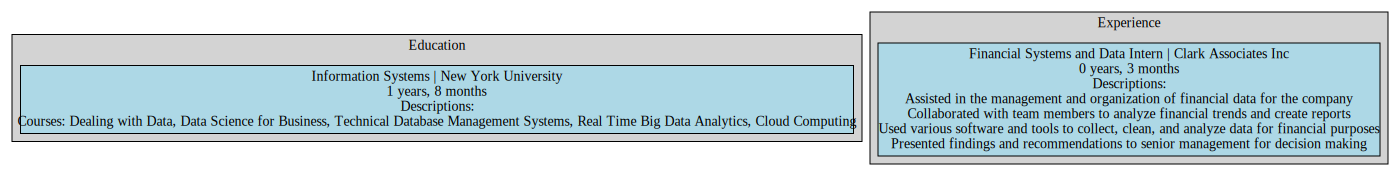

In [ ]:
from datetime import datetime
from graphviz import Digraph

# Sort education and experience data by start date
sorted_education = sorted(data['EDUCATION'], key=lambda x: datetime.strptime(x['start_date'], "%Y-%m-%dT%H:%M:%S"))
sorted_experience = sorted(data['EXPERIENCE'], key=lambda x: datetime.strptime(x['start_date'], "%Y-%m-%dT%H:%M:%S"))

# Initialize Digraph
dot = Digraph()

# Set rank direction to top to bottom
dot.attr(rankdir='RB')

# Create main subgraph for education
with dot.subgraph(name='cluster_education') as edu_subgraph:
    # Add education heading
    edu_subgraph.attr(label='Education', style='filled', fillcolor='lightgrey')

    # Add nodes for education
    for i, edu in enumerate(sorted_education):
        # Calculate duration
        start_date = datetime.strptime(edu['start_date'], "%Y-%m-%dT%H:%M:%S")
        end_date = datetime.strptime(edu['end_date'], "%Y-%m-%dT%H:%M:%S.%f")
        duration_in_months = (end_date.year - start_date.year) * 12 + (end_date.month - start_date.month)
        years = duration_in_months // 12
        months = duration_in_months % 12
        duration_str = f"{years} years, {months} months"

        # Format node label with university, duration, and descriptions
        description_str = '\n'.join(edu['description'])
        node_label = f"{edu['subject_name']} | {edu['institute_name']}\n{duration_str}\nDescriptions:\n{description_str}"

        # Add node to education subgraph
        edu_subgraph.node(f"edu_node_{i}", node_label, shape='box', style='filled', fillcolor='lightblue')

        # Add arrows between nodes in sorted order
        if i > 0:
            edu_subgraph.edge(f"edu_node_{i-1}", f"edu_node_{i}")

# Create second subgraph for experience
with dot.subgraph(name='cluster_experience') as exp_subgraph:
    # Add experience heading
    exp_subgraph.attr(label='Experience', style='filled', fillcolor='lightgrey')

    # Add nodes for experience
    for i, exp in enumerate(sorted_experience):
        # Calculate duration
        start_date = datetime.strptime(exp['start_date'], "%Y-%m-%dT%H:%M:%S")
        end_date = datetime.strptime(exp['end_date'], "%Y-%m-%dT%H:%M:%S.%f")
        duration_in_months = (end_date.year - start_date.year) * 12 + (end_date.month - start_date.month)
        years = duration_in_months // 12
        months = duration_in_months % 12
        duration_str = f"{years} years, {months} months"

        # Format node label with work title, duration, and descriptions
        description_str = '\n'.join(exp['descriptions'])
        node_label = f"{exp['title']} | {exp['company_name']}\n{duration_str}\nDescriptions:\n{description_str}"

        # Add node to experience subgraph
        exp_subgraph.node(f"exp_node_{i}", node_label, shape='box', style='filled', fillcolor='lightblue')

        # Add arrows between nodes in sorted order
        if i > 0:
            exp_subgraph.edge(f"exp_node_{i-1}", f"exp_node_{i}")

# Render and display the graph
dot.render('career_trajectory_sorted_with_dates_duration_arrows', format='png', cleanup=True)
dot


In [ ]:
end_time = time.time()
total_runtime = end_time - start_time
print(f"Total run time: {total_runtime} seconds")

Total run time: 574.0707130432129 seconds
